In [1]:
## This notebook will be used to explore quality control of each map by comparing replicates

In [2]:
## Import modules

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

In [3]:
## Import data

## Replicate sgmap
dmso1_r1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso1_r1_sgmap.xlsx',index_col = 0)
dmso1_r2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso1_r2_sgmap.xlsx',index_col = 0)

atr_r1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/atr_r1_sgmap.xlsx',index_col = 0)
atr_r2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/atr_r2_sgmap.xlsx',index_col = 0)

dmso2_r1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso2_r1_sgmap.xlsx',index_col = 0)
dmso2_r2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso2_r2_sgmap.xlsx',index_col = 0)

etop_r1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/etop_r1_sgmap.xlsx',index_col = 0)
etop_r2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/etop_r2_sgmap.xlsx',index_col = 0)

keto_r1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/keto_r1_sgmap.xlsx',index_col = 0)
keto_r2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/keto_r2_sgmap.xlsx',index_col = 0)


In [4]:
## Import data

## Replicate gene map

dmso1_r1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso1_r1_map.xlsx',index_col = 0)
dmso1_r2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso1_r2_map.xlsx',index_col = 0)

atr_r1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/atr_r1_map.xlsx',index_col = 0)
atr_r2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/atr_r2_map.xlsx',index_col = 0)

dmso2_r1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso2_r1_map.xlsx',index_col = 0)
dmso2_r2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso2_r2_map.xlsx',index_col = 0)

etop_r1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/etop_r1_map.xlsx',index_col = 0)
etop_r2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/etop_r2_map.xlsx',index_col = 0)

keto_r1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/keto_r1_map.xlsx',index_col = 0)
keto_r2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/keto_r2_map.xlsx',index_col = 0)

In [5]:
## Fill nan values with zero

dmso1_r1_map = dmso1_r1_map.fillna(0)
atr_r1_map = atr_r1_map.fillna(0)
dmso2_r1_map = dmso2_r1_map.fillna(0)
etop_r1_map = etop_r1_map.fillna(0)
keto_r1_map = keto_r1_map.fillna(0)

dmso1_r1_sgmap = dmso1_r1_sgmap.fillna(0)
atr_r1_sgmap = atr_r1_sgmap.fillna(0)
dmso2_r1_sgmap = dmso2_r1_sgmap.fillna(0)
etop_r1_sgmap = etop_r1_sgmap.fillna(0)
keto_r1_sgmap = keto_r1_sgmap.fillna(0)

dmso1_r2_map = dmso1_r2_map.fillna(0)
atr_r2_map = atr_r2_map.fillna(0)
dmso2_r2_map = dmso2_r2_map.fillna(0)
etop_r2_map = etop_r2_map.fillna(0)
keto_r2_map = keto_r2_map.fillna(0)

dmso1_r2_sgmap = dmso1_r2_sgmap.fillna(0)
atr_r2_sgmap = atr_r2_sgmap.fillna(0)
dmso2_r2_sgmap = dmso2_r2_sgmap.fillna(0)
etop_r2_sgmap = etop_r2_sgmap.fillna(0)
keto_r2_sgmap = keto_r2_sgmap.fillna(0)

In [6]:
## Import data

## We only need one singles table for the entire experiment in order to map sgRNAs back to genes

singles_table = pd.read_excel('/Users/benh/Desktop/GI_data/singles_tables/singles_table.xlsx',index_col = 0)


In [7]:
## Define functions

##Import Max's handy upperTriangle function to avoid counting AB BA GIs twice
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(dropna=False).loc[keep]

In [9]:
## Repave each pair of replicates to have the same index for sgRNA maps

intersect = list(set(dmso1_r1_sgmap.index).intersection(dmso1_r2_sgmap.index))
dmso1_r1_sgmap = dmso1_r1_sgmap.loc[intersect,intersect]
dmso1_r2_sgmap = dmso1_r2_sgmap.loc[intersect,intersect]

intersect = list(set(atr_r1_sgmap.index).intersection(atr_r2_sgmap.index))
atr_r1_sgmap = atr_r1_sgmap.loc[intersect,intersect]
atr_r2_sgmap = atr_r2_sgmap.loc[intersect,intersect]

intersect = list(set(dmso2_r1_sgmap.index).intersection(dmso2_r2_sgmap.index))
dmso2_r1_sgmap = dmso2_r1_sgmap.loc[intersect,intersect]
dmso2_r2_sgmap = dmso2_r2_sgmap.loc[intersect,intersect]

intersect = list(set(etop_r1_sgmap.index).intersection(etop_r2_sgmap.index))
etop_r1_sgmap = etop_r1_sgmap.loc[intersect,intersect]
etop_r2_sgmap = etop_r2_sgmap.loc[intersect,intersect]

intersect = list(set(keto_r1_sgmap.index).intersection(keto_r2_sgmap.index))
keto_r1_sgmap = keto_r1_sgmap.loc[intersect,intersect]
keto_r2_sgmap = keto_r2_sgmap.loc[intersect,intersect]

In [11]:
## Repave each pair of replicates to have the same index for gene maps

intersect = list(set(dmso1_r1_map.index).intersection(dmso1_r2_map.index))
dmso1_r1_map = dmso1_r1_map.loc[intersect,intersect]
dmso1_r2_map = dmso1_r2_map.loc[intersect,intersect]

intersect = list(set(atr_r1_map.index).intersection(atr_r2_map.index))
atr_r1_map = atr_r1_map.loc[intersect,intersect]
atr_r2_map = atr_r2_map.loc[intersect,intersect]

intersect = list(set(dmso2_r1_map.index).intersection(dmso2_r2_map.index))
dmso2_r1_map = dmso2_r1_map.loc[intersect,intersect]
dmso2_r2_map = dmso2_r2_map.loc[intersect,intersect]

intersect = list(set(etop_r1_map.index).intersection(etop_r2_map.index))
etop_r1_map = etop_r1_map.loc[intersect,intersect]
etop_r2_map = etop_r2_map.loc[intersect,intersect]

intersect = list(set(keto_r1_map.index).intersection(keto_r2_map.index))
keto_r1_map = keto_r1_map.loc[intersect,intersect]
keto_r2_map = keto_r2_map.loc[intersect,intersect]

In [12]:
## Generate sgrna level gene-ntc matrices for expt1 dmso 

dmso1_map_geneneg_rep1 =  dmso1_r1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

dmso1_map_geneneg_rep2 =  dmso1_r2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()


## Generate sgrna level gene-ntc matrices for expt1 atr 

atr_map_geneneg_rep1 =  atr_r1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

atr_map_geneneg_rep2 =  atr_r2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

## Generate sgrna level gene-ntc matrices for expt2 dmso 

dmso2_map_geneneg_rep1 =  dmso2_r1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

dmso2_map_geneneg_rep2 =  dmso2_r2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()


## Generate sgrna level gene-ntc matrices for expt2 etop 

etop_map_geneneg_rep1 =  etop_r1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

etop_map_geneneg_rep2 =  etop_r2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

## Generate sgrna level gene-ntc matrices for expt2 keto 

keto_map_geneneg_rep1 =  keto_r1_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()

keto_map_geneneg_rep2 =  keto_r2_sgmap.loc[singles_table['gene'] == 'non-targeting',
                                                  singles_table['gene'] != 'non-targeting'].groupby(singles_table['gene'],axis=1).mean()


Text(0, 0.5, 'DMSO1 rep2 gene level GI Scores')

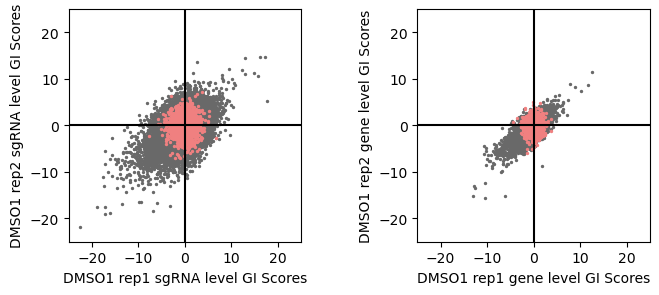

In [13]:
## Make sgrna and gene level replicate correlation plots

## Create plots for expt1

fig = plt.figure(figsize=(7.5, 7.5))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.5)

##Plot replicate sgRNA level GIs, use sgNEG pairs as a negative control distribution

active = plt.subplot(numPlots[0,0])
active.set_aspect('equal')

active.scatter(upperTriangle(dmso1_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(dmso1_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               s=2, c='dimgray')
active.scatter(dmso1_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               dmso1_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               s=2, c='lightcoral')
          
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('DMSO1 rep1 sgRNA level GI Scores')
active.set_ylabel('DMSO1 rep2 sgRNA level GI Scores')



##Plot replicate gene level GI correlations, use gene-neg pairs as a negative control distribution

active = plt.subplot(numPlots[0,1])
active.set_aspect('equal')

active.scatter(upperTriangle(dmso1_r1_map.loc[dmso1_r1_map.index != 'non-targeting',dmso1_r1_map.index != 'non-targeting']).values,
               upperTriangle(dmso1_r2_map.loc[dmso1_r2_map.index != 'non-targeting',dmso1_r2_map.index != 'non-targeting']).values,
              s=2, c='dimgray')

active.scatter(dmso1_map_geneneg_rep1.values,dmso1_map_geneneg_rep2.values,s=2,c='lightcoral')
    
    
    
    
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('DMSO1 rep1 gene level GI Scores')
active.set_ylabel('DMSO1 rep2 gene level GI Scores')

#plt.savefig('/Users/benh/Desktop/for_figs/dmso1_rep_correlations.png',dpi=300)


In [14]:
## Print out sgrna and gene level pearson correlations, plus negative control correlations

print(
stats.pearsonr(upperTriangle(dmso1_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(dmso1_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values)[0],
stats.pearsonr(np.hstack(dmso1_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values),
               np.hstack(dmso1_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values))[0]
)

print(
stats.pearsonr(upperTriangle(dmso1_r1_map.loc[dmso1_r1_map.index != 'non-targeting',dmso1_r1_map.index != 'non-targeting']).values,
               upperTriangle(dmso1_r2_map.loc[dmso1_r2_map.index != 'non-targeting',dmso1_r2_map.index != 'non-targeting']).values)[0],
stats.pearsonr(np.hstack(dmso1_map_geneneg_rep1.values),np.hstack(dmso1_map_geneneg_rep2.values))[0]
)


0.35142250561472477 0.056174468668975935
0.6052653629100158 0.06549656205173747


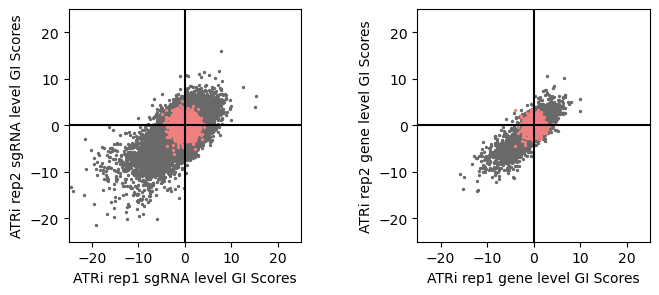

In [101]:
## Make sgrna and gene level replicate correlation plots

## Create plots for expt1

fig = plt.figure(figsize=(7.5, 7.5))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.5)

##Plot replicate sgRNA level GIs, use sgNEG pairs as a negative control distribution

active = plt.subplot(numPlots[0,0])
active.set_aspect('equal')

active.scatter(upperTriangle(atr_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(atr_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               s=2, c='dimgray')
active.scatter(atr_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               atr_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               s=2, c='lightcoral')
          
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('ATRi rep1 sgRNA level GI Scores')
active.set_ylabel('ATRi rep2 sgRNA level GI Scores')



##Plot replicate gene level GI correlations, use gene-neg pairs as a negative control distribution

active = plt.subplot(numPlots[0,1])
active.set_aspect('equal')

active.scatter(upperTriangle(atr_r1_map.loc[atr_r1_map.index != 'non-targeting',atr_r1_map.index != 'non-targeting']).values,
               upperTriangle(atr_r2_map.loc[atr_r2_map.index != 'non-targeting',atr_r2_map.index != 'non-targeting']).values,
              s=2, c='dimgray')

active.scatter(atr_map_geneneg_rep1.values,atr_map_geneneg_rep2.values,s=2,c='lightcoral')
    
    
    
    
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('ATRi rep1 gene level GI Scores')
active.set_ylabel('ATRi rep2 gene level GI Scores')

plt.savefig('/Users/benh/Desktop/for_figs/atr_rep_correlations.png',dpi=300)


In [102]:
## Print out sgrna and gene level pearson correlations, plus negative control correlations

print(
stats.pearsonr(upperTriangle(atr_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(atr_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values)[0],
stats.pearsonr(np.hstack(atr_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values),
               np.hstack(atr_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values))[0]
)

print(
stats.pearsonr(upperTriangle(atr_r1_map.loc[atr_r1_map.index != 'non-targeting',atr_r1_map.index != 'non-targeting']).values,
               upperTriangle(atr_r2_map.loc[atr_r2_map.index != 'non-targeting',atr_r2_map.index != 'non-targeting']).values)[0],
stats.pearsonr(np.hstack(atr_map_geneneg_rep1.values),np.hstack(atr_map_geneneg_rep2.values))[0]
)

0.5390717448471951 0.040862137808152066
0.7468489950823051 0.04414713203732672


Text(0, 0.5, 'DMSO2 rep2 gene level GI Scores')

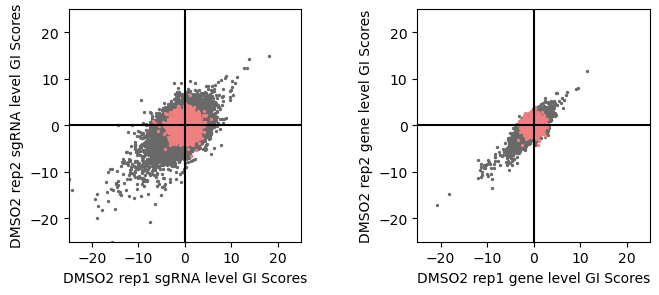

In [15]:
## Make sgrna and gene level replicate correlation plots

## Create plots for expt1

fig = plt.figure(figsize=(7.5, 7.5))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.5)

##Plot replicate sgRNA level GIs, use sgNEG pairs as a negative control distribution

active = plt.subplot(numPlots[0,0])
active.set_aspect('equal')

active.scatter(upperTriangle(dmso2_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(dmso2_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               s=2, c='dimgray')
active.scatter(dmso2_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               dmso2_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               s=2, c='lightcoral')
          
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('DMSO2 rep1 sgRNA level GI Scores')
active.set_ylabel('DMSO2 rep2 sgRNA level GI Scores')



##Plot replicate gene level GI correlations, use gene-neg pairs as a negative control distribution

active = plt.subplot(numPlots[0,1])
active.set_aspect('equal')

active.scatter(upperTriangle(dmso2_r1_map.loc[dmso2_r1_map.index != 'non-targeting',dmso2_r1_map.index != 'non-targeting']).values,
               upperTriangle(dmso2_r2_map.loc[dmso2_r2_map.index != 'non-targeting',dmso2_r2_map.index != 'non-targeting']).values,
              s=2, c='dimgray')

active.scatter(dmso2_map_geneneg_rep1.values,dmso2_map_geneneg_rep2.values,s=2,c='lightcoral')
    
    
    
    
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('DMSO2 rep1 gene level GI Scores')
active.set_ylabel('DMSO2 rep2 gene level GI Scores')

#plt.savefig('/Users/benh/Desktop/for_figs/dmso2_rep_correlations.png',dpi=300)


In [104]:
## Print out sgrna and gene level pearson correlations, plus negative control correlations

print(
stats.pearsonr(upperTriangle(dmso2_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(dmso2_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values)[0],
stats.pearsonr(np.hstack(dmso2_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values),
               np.hstack(dmso2_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values))[0]
)

print(
stats.pearsonr(upperTriangle(dmso2_r1_map.loc[dmso2_r1_map.index != 'non-targeting',dmso2_r1_map.index != 'non-targeting']).values,
               upperTriangle(dmso2_r2_map.loc[dmso2_r2_map.index != 'non-targeting',dmso2_r2_map.index != 'non-targeting']).values)[0],
stats.pearsonr(np.hstack(dmso2_map_geneneg_rep1.values),np.hstack(dmso2_map_geneneg_rep2.values))[0]
)

0.36522876353397193 0.06325703289060948
0.6303094752531834 0.09936337544811377


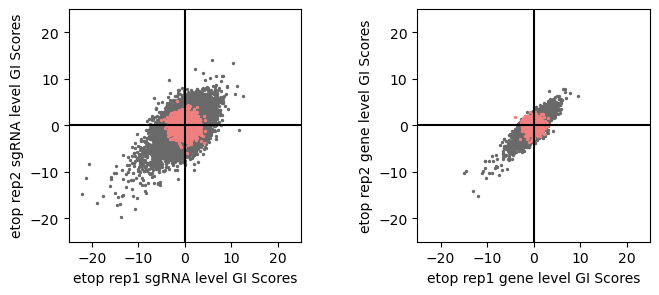

In [105]:
## Make sgrna and gene level replicate correlation plots

## Create plots for expt1

fig = plt.figure(figsize=(7.5, 7.5))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.5)

##Plot replicate sgRNA level GIs, use sgNEG pairs as a negative control distribution

active = plt.subplot(numPlots[0,0])
active.set_aspect('equal')

active.scatter(upperTriangle(etop_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(etop_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               s=2, c='dimgray')
active.scatter(etop_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               etop_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               s=2, c='lightcoral')
          
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('etop rep1 sgRNA level GI Scores')
active.set_ylabel('etop rep2 sgRNA level GI Scores')



##Plot replicate gene level GI correlations, use gene-neg pairs as a negative control distribution

active = plt.subplot(numPlots[0,1])
active.set_aspect('equal')

active.scatter(upperTriangle(etop_r1_map.loc[etop_r1_map.index != 'non-targeting',etop_r1_map.index != 'non-targeting']).values,
               upperTriangle(etop_r2_map.loc[etop_r2_map.index != 'non-targeting',etop_r2_map.index != 'non-targeting']).values,
              s=2, c='dimgray')

active.scatter(etop_map_geneneg_rep1.values,etop_map_geneneg_rep2.values,s=2,c='lightcoral')
    
    
    
    
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('etop rep1 gene level GI Scores')
active.set_ylabel('etop rep2 gene level GI Scores')

plt.savefig('/Users/benh/Desktop/for_figs/etop_rep_correlations.png',dpi=300)


In [106]:
## Print out sgrna and gene level pearson correlations, plus negative control correlations

print(
stats.pearsonr(upperTriangle(etop_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(etop_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values)[0],
stats.pearsonr(np.hstack(etop_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values),
               np.hstack(etop_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values))[0]
)

print(
stats.pearsonr(upperTriangle(etop_r1_map.loc[etop_r1_map.index != 'non-targeting',etop_r1_map.index != 'non-targeting']).values,
               upperTriangle(etop_r2_map.loc[etop_r2_map.index != 'non-targeting',etop_r2_map.index != 'non-targeting']).values)[0],
stats.pearsonr(np.hstack(etop_map_geneneg_rep1.values),np.hstack(etop_map_geneneg_rep2.values))[0]
)

0.36891937466539226 0.015283820856679538
0.6445764329967828 0.05898866386134258


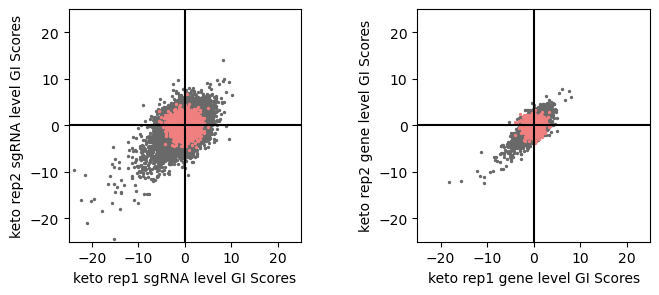

In [107]:
## Make sgrna and gene level replicate correlation plots

## Create plots for expt1

fig = plt.figure(figsize=(7.5, 7.5))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.5)

##Plot replicate sgRNA level GIs, use sgNEG pairs as a negative control distribution

active = plt.subplot(numPlots[0,0])
active.set_aspect('equal')

active.scatter(upperTriangle(keto_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(keto_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               s=2, c='dimgray')
active.scatter(keto_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               keto_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values,
               s=2, c='lightcoral')
          
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('keto rep1 sgRNA level GI Scores')
active.set_ylabel('keto rep2 sgRNA level GI Scores')



##Plot replicate gene level GI correlations, use gene-neg pairs as a negative control distribution

active = plt.subplot(numPlots[0,1])
active.set_aspect('equal')

active.scatter(upperTriangle(keto_r1_map.loc[keto_r1_map.index != 'non-targeting',keto_r1_map.index != 'non-targeting']).values,
               upperTriangle(keto_r2_map.loc[keto_r2_map.index != 'non-targeting',keto_r2_map.index != 'non-targeting']).values,
              s=2, c='dimgray')

active.scatter(keto_map_geneneg_rep1.values,keto_map_geneneg_rep2.values,s=2,c='lightcoral')
    
    
    
    
active.plot([-25,25],[0,0],c='black')
active.plot([0,0],[-25,25],c='black')

active.set_xlim([-25,25])
active.set_ylim([-25,25])

active.set_xlabel('keto rep1 gene level GI Scores')
active.set_ylabel('keto rep2 gene level GI Scores')

plt.savefig('/Users/benh/Desktop/for_figs/keto_rep_correlations.png',dpi=300)


In [108]:
## Print out sgrna and gene level pearson correlations, plus negative control correlations

print(
stats.pearsonr(upperTriangle(keto_r1_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values,
               upperTriangle(keto_r2_sgmap.loc[singles_table['gene'] != 'nontargeting',singles_table['gene'] != 'nontargeting']).values)[0],
stats.pearsonr(np.hstack(keto_r1_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values),
               np.hstack(keto_r2_sgmap.loc[singles_table['gene'] != 'non-targeting',singles_table['gene'] == 'non-targeting'].values))[0]
)

print(
stats.pearsonr(upperTriangle(keto_r1_map.loc[keto_r1_map.index != 'non-targeting',keto_r1_map.index != 'non-targeting']).values,
               upperTriangle(keto_r2_map.loc[keto_r2_map.index != 'non-targeting',keto_r2_map.index != 'non-targeting']).values)[0],
stats.pearsonr(np.hstack(keto_map_geneneg_rep1.values),np.hstack(keto_map_geneneg_rep2.values))[0]
)

0.31342454215207094 0.030324459058241368
0.5503143323427926 0.052907530712967304
